In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
print(X_train.shape)

(60000, 28, 28)


In [9]:
print(X_test.shape)

(10000, 28, 28)


In [10]:
print(y_train.shape)

(60000,)


In [11]:
print(y_test.shape)

(10000,)


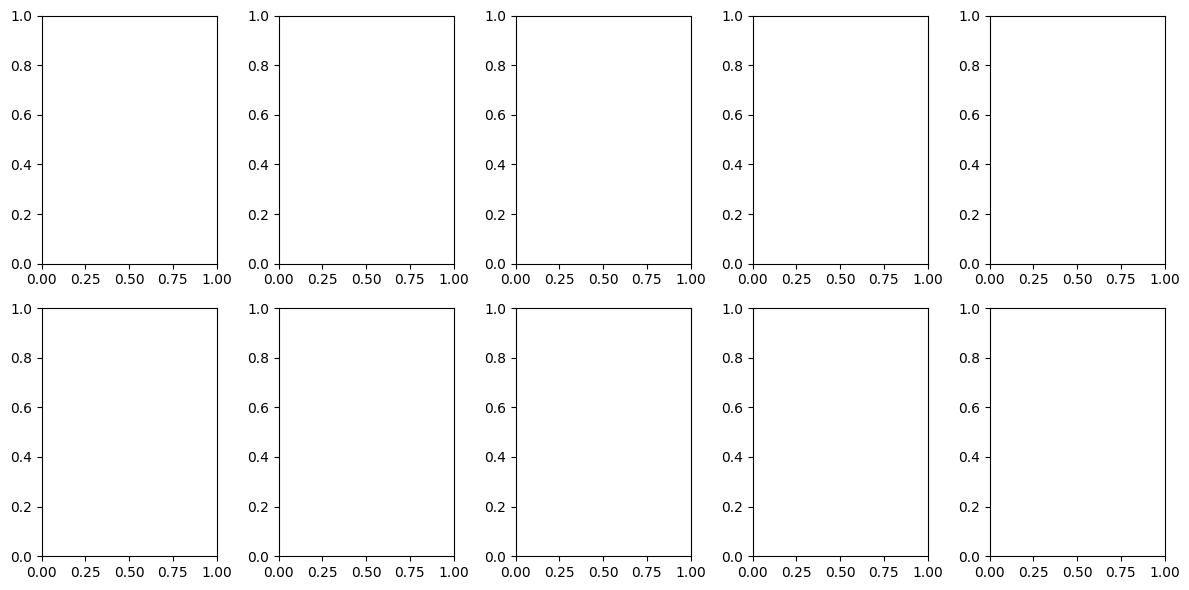

In [12]:
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')

In [13]:
n=0
for i in range(0,2):
  for j in range(0,5):
    axs[i,j].matshow(X_train[n])
    axs[i,j].set(title=y_train[n])
    n+=1
plt.show()

In [14]:
X_train = X_train.reshape(60000, 784).astype("float32") / 255

In [15]:
X_test = X_test.reshape(10000, 784).astype("float32") / 255

In [18]:
print(X_train.shape)

(60000, 784)


In [19]:
print(X_test.shape)

(10000, 784)


In [20]:
model = Sequential(name="DFF-Model")
model.add(Input(shape=(784,), name='Input-Layer'))

model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['Accuracy'], loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None)
model.fit(X_train, y_train, batch_size=10, epochs=5, verbose='auto', callbacks=None, validation_split=0.2, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=5, max_queue_size=10, workers=1, use_multiprocessing=False,)
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train),axis=1))
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test),axis=1))
model.summary()
print(classification_report(y_train, pred_labels_tr))
print(classification_report(y_test, pred_labels_te))

Epoch 1/5
4800/4800 [==============================] - 18s 3ms/step - loss: 0.2447 - Accuracy: 0.9258
Epoch 2/5
4800/4800 [==============================] - 13s 3ms/step - loss: 0.1153 - Accuracy: 0.9653
Epoch 3/5
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0831 - Accuracy: 0.9743
Epoch 4/5
4800/4800 [==============================] - 13s 3ms/step - loss: 0.0685 - Accuracy: 0.9794
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Model: "DFF-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Hidden-Layer-3 (Dense)      (None, 32)                2080      
                                              